In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### setup inline format style of tables

In [264]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [265]:
sns.set_palette("deep", desat=0.6)
sns.set_context(rc={"figure.figsize": (8,4)})

In [266]:
data = pd.read_csv('Data_Shared_WorkingFile.csv')
data.head()

Entity  Run_On_Ent       Lot    Op  Error  Feature1  Feature2  Feature3  \
0   201A           1  201AKMON  3514    NaN       250        70       1.5   
1   201A           2  201AKMON  3514    NaN       250        70       1.5   
2   201A           3  201AERAT  3504    NaN       600        15       3.0   
3   201A           4  201AKMON  3514    NaN       250        70       1.5   
4   201A           5  201AKMON  3514    NaN       250        70       1.5   

   Feature4  Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  \
0       4.0           0           1           0           0           1   
1       4.0           0           1           0           0           1   
2       8.0           1           0           0           0           0   
3       4.0           0           1           0           0           1   
4       4.0           0           1           0           0           1   

  Fam_Type DIC_Design  
0      NaN        NaN  
1      NaN        NaN  
2      NaN        NaN  
3      NaN        NaN  
4      NaN        NaN

### Checking out the shape of the data file.

In [267]:
print ("Data Shape:", data.shape)

Data Shape: (71568, 16)


### We can see that there are roughly 4k critical data pts available.   Minimum abs error is best so it makes sense that the process has Error mean close to zero at -0.07.  1s = ~0.9

In [268]:
data.dtypes

Entity         object
Run_On_Ent      int64
Lot            object
Op              int64
Error         float64
Feature1        int64
Feature2        int64
Feature3      float64
Feature4      float64
Attribute1      int64
Attribute2      int64
Attribute3      int64
Attribute4      int64
Attribute5      int64
Fam_Type       object
DIC_Design     object
dtype: object

In [269]:
data.Error.describe()

count    3985.000000
mean       -0.073852
std         0.900633
min        -7.700000
25%        -0.544000
50%        -0.048000
75%         0.453000
max         6.467000
Name: Error, dtype: float64

### see what columns have data missing

In [270]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Count_Nulls']
nulls.index.name = 'Data_Column'
nulls

Count_Nulls
Data_Column             
Error              67583
DIC_Design         65961
Fam_Type           65961
Attribute5             0
Attribute4             0
Attribute3             0
Attribute2             0
Attribute1             0
Feature4               0
Feature3               0
Feature2               0
Feature1               0
Op                     0
Lot                    0
Run_On_Ent             0
Entity                 0

### We can see the Error of the whole entire data set is normal Gaussian distribution centered about zero.

Error skew: -0.342304438317


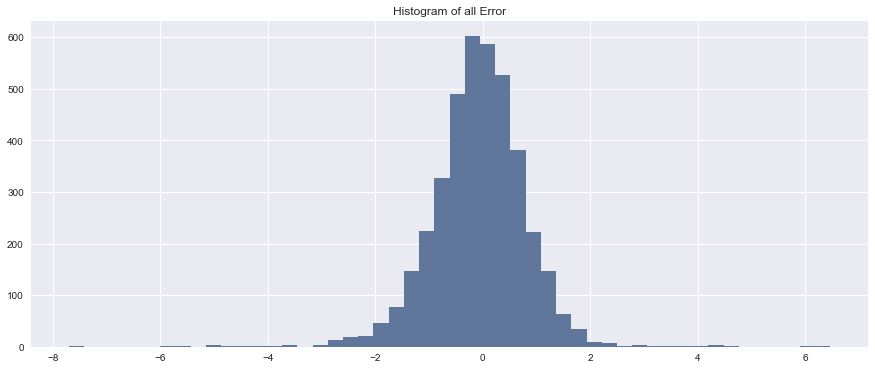

In [271]:
print('Error skew:',data.Error.skew())
plt.figure(figsize=(15,6))
plt.hist(data.Error.dropna(),bins=50)
plt.title('Histogram of all Error')

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


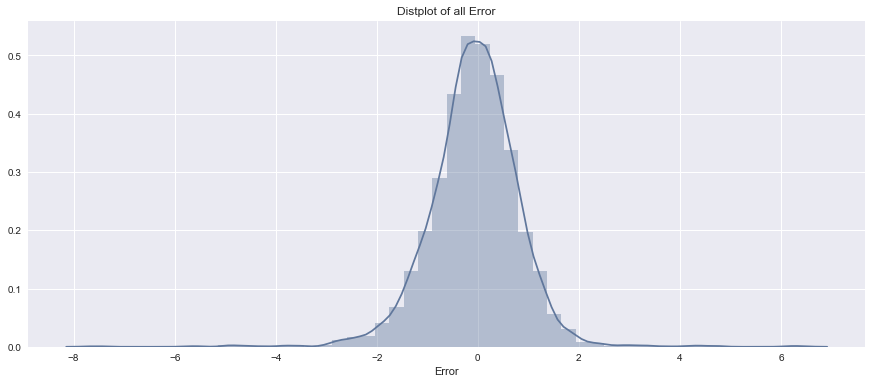

In [272]:
plt.figure(figsize=(15,6))
sns.distplot(data.Error.dropna(), bins = 50)
plt.title('Distplot of all Error')

### Explore data sets by Entity.  Common in production environments to break out and explore data by tool or entity to see if they are performing similarly.

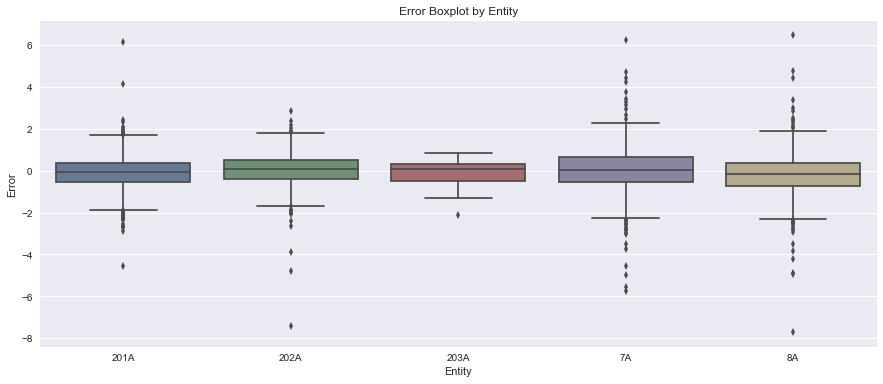

In [273]:
#boxplots by entity
datacompare = data.dropna()
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Entity', y = 'Error', data = datacompare)
plt.title('Error Boxplot by Entity')

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


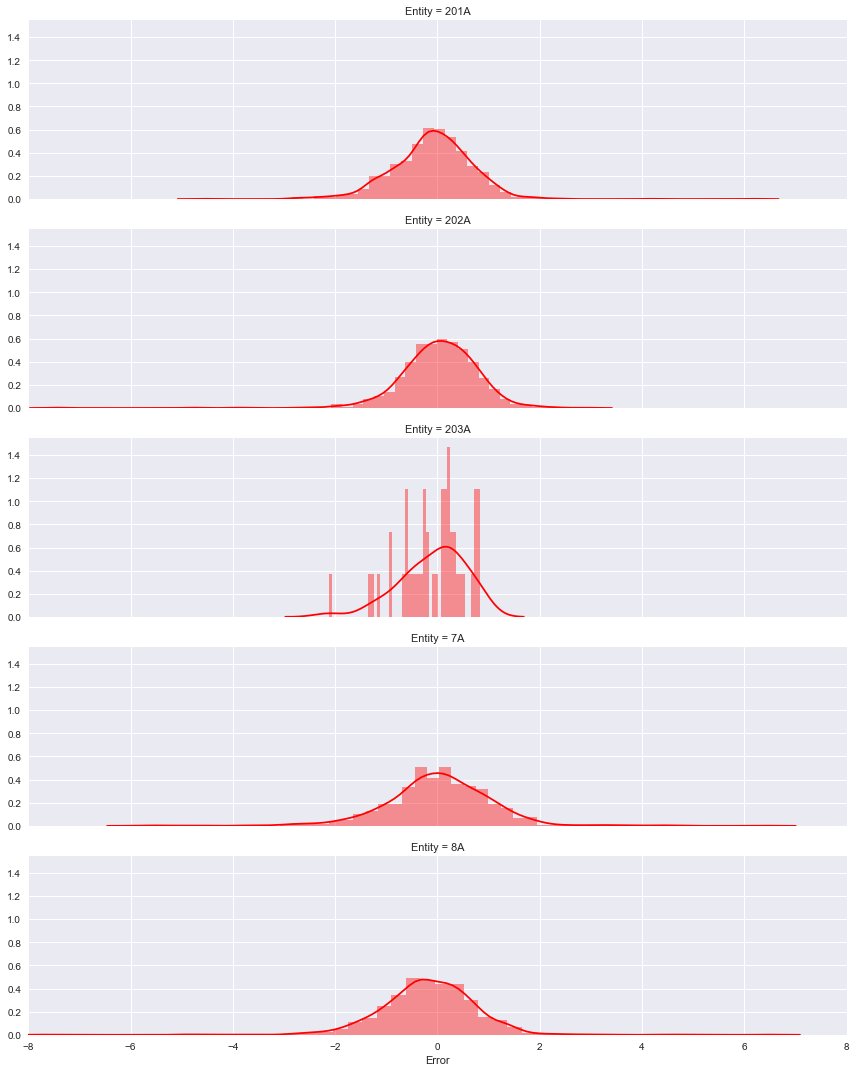

In [274]:
#very noteworthy that Entity = 203A does not have as uniform a dataset as the other entities.  possibly remove from later 
#models to explore impact.
g = sns.FacetGrid(datacompare, row = "Entity", aspect = 4, xlim = (-8,8))
g.map(sns.distplot, 'Error', bins = 50, color = 'r')

### Create time series of a single Entity run (where we see Run_On_Ent restart at 1).  This will be used as our toy dataset.  

In [275]:
#create toy data sets by entity, we will work w toy7 which has the most rows and a very normal distribution
toy7_df = data.loc[data['Entity'] == '7A']
toy8_df = data.loc[data['Entity'] == '8A']
toy201_df = data.loc[data['Entity'] == '201A']
toy202_df = data.loc[data['Entity'] == '202A']
toy203_df = data.loc[data['Entity'] == '203A']
toy7_df

Entity  Run_On_Ent       Lot    Op  Error  Feature1  Feature2  Feature3  \
27805     7A           1    246186  3524    NaN       800        12       1.5   
27806     7A           2  7A_CLEAN  3504    NaN       600         0       8.0   
27807     7A           3    245352  3524    NaN       800        12       1.5   
27808     7A           4    246782  3524    NaN       800        12       1.5   
27809     7A           5    245739  3534    NaN       800        15       6.0   
27810     7A           6    245927  3504    NaN       800        20       1.5   
27811     7A           7    7AERAT  3504    NaN       600        15       3.0   
27812     7A           8    7ACMON  3514    NaN       250        70       1.5   
27813     7A           9    246621  3524    NaN       800        12       1.5   
27814     7A          10    246676  3524    NaN       800        12       1.5   
27815     7A          11    246187  3504    NaN       250        70       1.5   
27816     7A          12    246493  3524    NaN       800        12       1.5   
27817     7A          13    246188  3524    NaN       800        12       1.5   
27818     7A          14   246083A  3534    NaN       800        20       1.5   
27819     7A          15    247003  3504    NaN       250        70       1.5   
27820     7A          16    246185  3504    NaN       250        70       1.5   
27821     7A          17    247011  3504    NaN       800        12       1.5   
27822     7A          18    246904  3504    NaN       250        70       1.5   
27823     7A          19    246606  3534    NaN       800        20       1.5   
27824     7A          20  7A_CLEAN  3504    NaN       600         0       8.0   
27825     7A          21    246187  3524    NaN       800        12       1.5   
27826     7A          22    246445  3544    NaN       800        12       1.5   
27827     7A          23    246443  3544    NaN       800        12       1.5   
27828     7A          24    7ACMON  3514    NaN       250        70       1.5   
27829     7A          25    246674  3524    NaN       800        12       1.5   
27830     7A          26    246492  3504    NaN       250        70       1.5   
27831     7A          27    246444  3544    NaN       800        12       1.5   
27832     7A          28    245959  3524    NaN       250        17       6.0   
27833     7A          29    246102  3524    NaN       250        17       6.0   
27834     7A          30    246492  3524    NaN       800        12       1.5   
27835     7A          31    247011  3544    NaN       800        12       1.5   
27836     7A          32    246368  3504    NaN       250        70       1.5   
27837     7A          33    245957  3524    NaN       250        17       6.0   
27838     7A          34    247003  3524    NaN       800        12       1.5   
27839     7A          35    246849  3524    NaN       250        17       6.0   
27840     7A          36    247000  3524    NaN       250        17       6.0   
27841     7A          37  7A_CLEAN  3504    NaN       600         0       8.0   
27842     7A          38    245958  3524    NaN       250        17       6.0   
27843     7A          39    246904  3524    NaN       800        12       1.5   
27844     7A          40    246661  3534    NaN       800        15       6.0   
27845     7A          41    246518  3524    NaN       250        17       6.0   
27846     7A          42    246330  3524    NaN       250        17       6.0   
27847     7A          43    246998  3524    NaN       250        17       6.0   
27848     7A          44    246368  3524    NaN       800        12       1.5   
27849     7A          45    245263  3534    NaN       800        15       6.0   
27850     7A          46    245264  3534    NaN       800        15       6.0   
27851     7A          47    246882  3524    NaN       250        17       6.0   
27852     7A          48    247050  3504    NaN       800        20       1.5   
27853     7A          49    246929  3

### Focusing on Toy7 data set

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


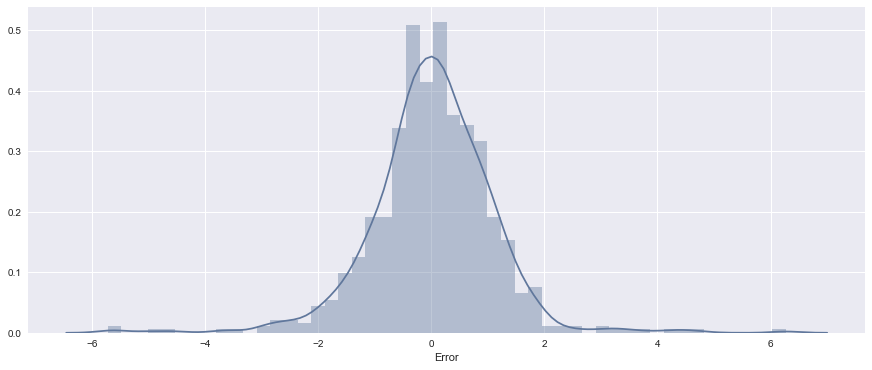

In [276]:
#we can see the toy dataset is also a well formed Gaussian centered about 0.
plt.figure(figsize=(15,6))
sns.distplot(toy7_df.Error.dropna(), bins = 50)

In [277]:
toy7_df.Error.describe()

count    764.000000
mean       0.017473
std        1.086037
min       -5.725000
25%       -0.524750
50%        0.046500
75%        0.648000
max        6.269000
Name: Error, dtype: float64

### the time series scatter plot is significant in that it shows a couple of significant things.  we can see the mean and variability are roughly stable throughout the life of the dataset.  Variance is homoscedastic although it may tighten slightly in the dataset after 15k.  Also, the customer's critical data does not actually start until roughly 4k data pts.  

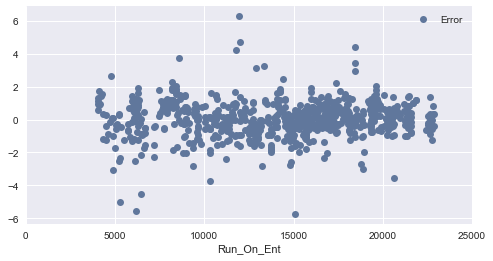

In [278]:
toy7_df.plot(x = 'Run_On_Ent', y = 'Error', xlim = [0, 25000], style = 'o')

### Begin data analysis by lagging all features and attributes from 1-20 lags and creating a new df from this combined with all the "Error" measurements in the toy7 dataset.  The lag was chosen with input from customer process data expert.  Experimental evidence points to lagging influence being confined to most preceding runs (possibly only several runs).  Therefore, we cap the lagging to 20 and increment by single runs.   Intitial analysis will be confined to exploring each attr/variable independantly, but later will expand to combinations.

In [279]:
#build a new dataframe that lags over each feature.  (default lag = 2 if none provided)
def FeatureLagging (datasystem, lag = 2, dropna = False):
    if type(datasystem) is pd.DataFrame:
        new_dict = {}
        for col_name in datasystem:
            if "Feature" in col_name or "Attribute" in col_name:
                new_dict[col_name] = datasystem[col_name]
                for xshift in range(1, lag + 1):
                    new_dict['%s_lag%d' % (col_name, xshift)] = datasystem[col_name].shift(xshift)
            else: 
                pass
            res = pd.DataFrame(new_dict, index = datasystem.index)
            
    else:
        print('error - must be 2D dataframe')
        return None

    if dropna == True:
        return res.dropna()
    else: return res


In [280]:
#use sequential run_on_ent as our row index
s = toy7_df.set_index('Run_On_Ent')
s.head()

Entity       Lot    Op  Error  Feature1  Feature2  Feature3  \
Run_On_Ent                                                               
1              7A    246186  3524    NaN       800        12       1.5   
2              7A  7A_CLEAN  3504    NaN       600         0       8.0   
3              7A    245352  3524    NaN       800        12       1.5   
4              7A    246782  3524    NaN       800        12       1.5   
5              7A    245739  3534    NaN       800        15       6.0   

            Feature4  Attribute1  Attribute2  Attribute3  Attribute4  \
Run_On_Ent                                                             
1                5.0           0           1           0           1   
2                0.0           0           0           0           0   
3                5.0           0           1           0           0   
4                5.0           0           1           0           0   
5                5.0           1           1           0           0   

            Attribute5 Fam_Type DIC_Design  
Run_On_Ent                                  
1                    1      NaN        NaN  
2                    1      NaN        NaN  
3                    1      NaN        NaN  
4                    1      NaN        NaN  
5                    0      NaN        NaN

In [281]:
#Use feature lagging function to shift all attributes/features and align with Error into a new df
lag7_df = FeatureLagging(s,lag=20,dropna=False)
lag7_df.insert(0, 'Error', s.Error)
lag7_df#.Error.describe()

Error  Attribute1  Attribute1_lag1  Attribute1_lag10  \
Run_On_Ent                                                         
1             NaN           0              NaN               NaN   
2             NaN           0              0.0               NaN   
3             NaN           0              0.0               NaN   
4             NaN           0              0.0               NaN   
5             NaN           1              0.0               NaN   
6             NaN           1              1.0               NaN   
7             NaN           1              1.0               NaN   
8             NaN           0              1.0               NaN   
9             NaN           0              0.0               NaN   
10            NaN           0              0.0               NaN   
11            NaN           0              0.0               0.0   
12            NaN           0              0.0               0.0   
13            NaN           0              0.0               0.0   
14            NaN           1              0.0               0.0   
15            NaN           0              1.0               1.0   
16            NaN           0              0.0               1.0   
17            NaN           1              0.0               1.0   
18            NaN           0              1.0               0.0   
19            NaN           1              0.0               0.0   
20            NaN           0              1.0               0.0   
21            NaN           0              0.0               0.0   
22            NaN           1              0.0               0.0   
23            NaN           1              1.0               0.0   
24            NaN           0              1.0               1.0   
25            NaN           0              0.0               0.0   
26            NaN           0              0.0               0.0   
27            NaN           1              0.0               1.0   
28            NaN           1              1.0               0.0   
29            NaN           1              1.0               1.0   
30            NaN           0              1.0               0.0   
31            NaN           1              0.0               0.0   
32            NaN           0              1.0               1.0   
33            NaN           1              0.0               1.0   
34            NaN           0              1.0               0.0   
35            NaN           1              0.0               0.0   
36            NaN           1              1.0               0.0   
37            NaN           0              1.0               1.0   
38            NaN           1              0.0               1.0   
39            NaN           0              1.0               1.0   
40            NaN           1              0.0               0.0   
41            NaN           1              1.0               1.0   
42            NaN           1              1.0               0.0   
43            NaN           1              1.0               1.0   
44            NaN           0              1.0               0.0   
45            NaN           1              0.0               1.0   
46            NaN           1              1.0               1.0   
47            NaN           1              1.0               0.0   
48            NaN           1              1.0               1.0   
49            NaN           1              1.0               0.0   
50            NaN           0              1.0               1.0   
51            NaN           0              0.0               1.0   
52            NaN           0              0.0               1.0   
53            NaN           0              0.0               1.0   
54            NaN           0              0.0               0.0   
55            NaN           0              0.0               1.0   
56            NaN           1              0.0               1.0   
57            NaN           0              1.0               1.0   


In [282]:
#new ndarray where we only look at row with 'Error' available and the corresponding lagged attributes from out matrix
lag7data_df = lag7_df.dropna()
lag7data_df

Error  Attribute1  Attribute1_lag1  Attribute1_lag10  \
Run_On_Ent                                                                
4031        9.290000e-01           0              0.0               0.0   
4057        1.101000e+00           0              0.0               0.0   
4064        1.304000e+00           0              0.0               1.0   
4066        5.990000e-01           0              1.0               0.0   
4121        1.738000e+00           0              0.0               0.0   
4132        8.780000e-01           0              1.0               0.0   
4172        9.300000e-01           0              0.0               1.0   
4204        1.408000e+00           0              0.0               0.0   
4269        1.525000e+00           0              0.0               1.0   
4325        3.530000e-01           0              0.0               0.0   
4342       -1.173000e+00           0              0.0               0.0   
4475        2.810000e-01           0              0.0               1.0   
4484       -3.780000e-01           0              0.0               0.0   
4512       -1.255000e+00           0              0.0               0.0   
4586       -8.780000e-01           0              0.0               0.0   
4727       -1.290000e-01           0              0.0               0.0   
4772        2.642000e+00           0              1.0               0.0   
4829        8.700000e-02           0              0.0               1.0   
4877        9.900000e-02           0              0.0               1.0   
4881       -1.014000e+00           0              0.0               0.0   
4897       -3.042000e+00           0              1.0               0.0   
4991       -1.744000e+00           0              0.0               0.0   
5046       -3.040000e-01           0              0.0               1.0   
5059       -5.720000e-01           0              0.0               0.0   
5116       -2.850000e-01           0              0.0               1.0   
5206       -2.543000e+00           0              0.0               1.0   
5209        2.920000e-01           0              0.0               0.0   
5238        3.160000e-01           0              0.0               0.0   
5281       -4.980000e+00           0              0.0               0.0   
5283       -2.335000e+00           0              0.0               0.0   
5312       -4.820000e-01           0              0.0               1.0   
5529       -1.216000e+00           0              0.0               0.0   
5729       -6.490000e-01           0              0.0               0.0   
5742       -7.000000e-01           0              0.0               0.0   
5747       -2.620000e-01           0              0.0               0.0   
5811        6.980000e-01           0              0.0               1.0   
5821       -1.079000e+00           0              0.0               0.0   
5936        1.420000e+00           0              0.0               1.0   
5967        1.120000e+00           0              0.0               0.0   
5976       -1.280000e+00           0              0.0               0.0   
5980       -1.740000e-01           0              0.0               0.0   
5982        7.980000e-01           0              0.0               0.0   
6013        1.160000e+00           0              0.0               1.0   
6031        5.660000e-01           0              0.0               0.0   
6051        4.670000e-01           0              0.0               0.0   
6072       -1.174000e+00           0              0.0               0.0   
6079        9.700000e-02           0              0.0               0.0   
6123       -8.000000e-02           0              0.0               0.0   
6129       -2.525000e+00           0              0.0               1.0   
6139        9.850000e-01           0              0.0               0.0   
6145        8.850000e-01           0              0.0               1.0   
6162        9.270000e-01           0        

In [283]:
lag7data_df.describe()

Error  Attribute1  Attribute1_lag1  Attribute1_lag10  \
count  764.000000       764.0       764.000000        764.000000   
mean     0.017473         0.0         0.066754          0.346859   
std      1.086037         0.0         0.249759          0.476282   
min     -5.725000         0.0         0.000000          0.000000   
25%     -0.524750         0.0         0.000000          0.000000   
50%      0.046500         0.0         0.000000          0.000000   
75%      0.648000         0.0         0.000000          1.000000   
max      6.269000         0.0         1.000000          1.000000   

       Attribute1_lag11  Attribute1_lag12  Attribute1_lag13  Attribute1_lag14  \
count        764.000000        764.000000        764.000000        764.000000   
mean           0.373037          0.332461          0.352094          0.401832   
std            0.483929          0.471404          0.477936          0.490590   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            1.000000          1.000000          1.000000          1.000000   
max            1.000000          1.000000          1.000000          1.000000   

       Attribute1_lag15  Attribute1_lag16      ...        Feature4_lag19  \
count        764.000000        764.000000      ...            764.000000   
mean           0.357330          0.321990      ...              4.673194   
std            0.479527          0.467545      ...              2.081132   
min            0.000000          0.000000      ...              0.000000   
25%            0.000000          0.000000      ...              4.000000   
50%            0.000000          0.000000      ...              4.000000   
75%            1.000000          1.000000      ...              5.000000   
max            1.000000          1.000000      ...             10.000000   

       Feature4_lag2  Feature4_lag20  Feature4_lag3  Feature4_lag4  \
count     764.000000      764.000000     764.000000     764.000000   
mean        5.142644        4.686702       4.934542       4.616034   
std         2.223521        2.200762       2.246346       2.032633   
min         0.000000        0.000000       0.000000       0.000000   
25%         4.000000        4.000000       4.000000       4.000000   
50%         5.000000        4.000000       4.500000       4.000000   
75%         5.000000        5.000000       5.000000       5.000000   
max        10.000000       10.000000      10.000000      10.000000   

       Feature4_lag5  Feature4_lag6  Feature4_lag7  Feature4_lag8  \
count     764.000000     764.000000     764.000000     764.000000   
mean        4.883482       4.920563       4.916230       4.897461   
std         2.178617       2.275242       2.158418       2.102419   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.000000       4.000000       4.000000       4.000000   
50%         4.000000       4.500000       4.000000       5.000000   
75%         5.000000       5.000000       5.000000       5.000000   
max        10.000000      10.000000      10.000000      10.000000   

       Feature4_lag9  
count     764.000000  
mean        4.728168  
std         2.137410  
min         0.000000  
25%         4.000000  
50%         4.000000  
75%         5.000000  
max        10.000000  

[8 rows x 190 columns]

In [284]:
from scipy import signal

### Welch's Cross Power Spectral Density weighted Coherence

In [285]:
CSD_Matrix = {}           #dict of cross spectral density matrix
CSD_Amp = {}              #dict of modulus of complex CSD_Matrix
Coh_Matrix = {}           #dict to make coherence matrix
w_Coh = {}                #dict of final weighted coherence

for col in lag7_df:
        if col != 'Error': #only compare Error to each lagged attribute, not itself
            
            #cross spectral density 
            f1, CSD_Matrix[col] = signal.csd(lag7data_df.Error, lag7data_df[col], 1)
            
            #calc modulus of complex CSD as CSD amplitude
            CSD_Amp[col] = sqrt(CSD_Matrix[col].real**2 + CSD_Matrix[col].imag**2)  
            
            #coherence of Error and each feature/attribute from time lagged dataframe
            f2, Coh_Matrix[col] = signal.coherence(lag7data_df.Error, lag7data_df[col], 1)


C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\signal\spectral.py:627: RuntimeWarning: invalid value encountered in true_divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


Weighted Coherence defined by weighting Cross Spectral Density Amplitude

In [286]:
for col in lag7_df:
        if col != 'Error': #only compare Error to each lagged attribute, not itself
            w_Coh[col] = sum(CSD_Amp[col] * Coh_Matrix[col]) / sum(CSD_Amp[col]) 

In [287]:
w_Coh_df = pd.Series(w_Coh, name = 'weighted_Coh').fillna(0).sort_values(ascending = False)
w_Coh_df.to_frame()

weighted_Coh
Attribute1_lag14      0.428801
Feature1_lag6         0.407905
Feature1_lag17        0.404339
Attribute5_lag2       0.393565
Feature2_lag19        0.393031
Attribute4_lag18      0.390530
Feature1_lag19        0.389658
Attribute5_lag18      0.387216
Attribute4_lag13      0.386490
Attribute3_lag13      0.386479
Feature2_lag20        0.381566
Feature2_lag6         0.377143
Feature4_lag10        0.376262
Attribute2_lag6       0.376084
Feature2_lag18        0.375136
Attribute3_lag7       0.374826
Attribute3_lag18      0.374409
Feature3_lag16        0.374365
Attribute5_lag20      0.374195
Attribute5_lag13      0.373153
Feature4_lag2         0.373107
Feature2_lag17        0.372476
Feature4_lag18        0.371817
Attribute3_lag20      0.370023
Attribute1_lag9       0.369157
Feature2_lag12        0.368328
Attribute1_lag16      0.365957
Attribute5_lag14      0.364095
Attribute1_lag20      0.363888
Feature2_lag9         0.363214
Attribute5_lag7       0.362821
Attribute1_lag13      0.361689
Feature4_lag17        0.361043
Feature1_lag5         0.361020
Attribute2_lag15      0.360343
Attribute5_lag17      0.360203
Feature4_lag3         0.359425
Feature1_lag4         0.359318
Feature2_lag8         0.359251
Feature3_lag3         0.358383
Feature2_lag15        0.358216
Attribute3_lag19      0.357720
Feature3_lag13        0.357642
Feature4_lag13        0.356125
Attribute5_lag11      0.355906
Feature2_lag16        0.355345
Attribute1_lag6       0.355197
Attribute4_lag2       0.354945
Attribute3_lag2       0.354173
Feature1_lag18        0.353836
Attribute1_lag1       0.353755
Attribute4_lag5       0.351726
Feature1_lag2         0.351442
Feature2_lag14        0.351111
Attribute5_lag15      0.350990
Feature3_lag10        0.350606
Attribute2_lag1       0.350570
Feature3_lag2         0.350260
Feature1_lag14        0.350143
Feature4_lag19        0.349378
Attribute1_lag15      0.348909
Attribute5_lag10      0.348514
Feature4_lag6         0.348216
Attribute5_lag5       0.347944
Feature3_lag12        0.347073
Feature4_lag7         0.346657
Feature1_lag15        0.346611
Feature1_lag3         0.346252
Feature4_lag20        0.346199
Attribute5_lag9       0.346173
Attribute3_lag6       0.345645
Attribute2_lag20      0.344722
Attribute2_lag4       0.344377
Attribute4_lag4       0.343573
Feature2_lag5         0.342235
Feature1_lag9         0.341987
Attribute2_lag8       0.341633
Attribute4_lag17      0.341427
Attribute3_lag17      0.340686
Attribute4_lag7       0.340308
Attribute4_lag19      0.339808
Feature3_lag1         0.339617
Feature3_lag20        0.339546
Feature3_lag6         0.339504
Attribute1_lag2       0.339453
Attribute2_lag2       0.339120
Attribute3_lag10      0.338885
Attribute3_lag8       0.338613
Feature2_lag4         0.338076
Attribute2_lag13      0.337480
Attribute2_lag3       0.336146
Attribute2_lag16      0.336146
Feature2_lag1         0.335825
Feature4_lag4         0.335693
Attribute3_lag14      0.334841
Feature3_lag8         0.334429
Attribute1_lag10      0.334403
Attribute5_lag3       0.334092
Feature3_lag7         0.332687
Attribute3_lag15      0.332112
Feature4_lag8         0.332090
Attribute5_lag4       0.331307
Attribute4_lag14      0.331108
Feature1_lag10        0.330483
Attribute5_lag8       0.330174
Attribute4_lag20      0.329647
Attribute2_lag12      0.329546
Feature1_lag16        0.329543
Feature1_lag20        0.328981
Feature4_lag12        0.327477
Feature4_lag1         0.327403
Feature3_lag19        0.327203
Attribute3_lag3       0.326832
Attribute5_lag16      0.326306
Attribute4_lag8       0.325240
Feature4_lag16        0.325165
Feature2_lag10        0.324581
Feature1_lag12        0.324455
Attribute2_lag19      0.324183
Feature1_lag8         0.324173
Attribute1_lag12      0.323957
Feature2_lag13        0.323412
Attribute4_lag10      0.323200
Attribute3_lag16      0.323015
Feature2_lag11        0.322606
Attribute1_lag19      0.322424
Attribute1_lag5       0.322359
Attribute4_lag9       0.321730
Attribute2_lag5    

### The weighted coherence do not indicate a usable lag function when confined to toy7_df and a single attribute/feature.   This may be due to overlap of single attributes/features across multiple types of products running.  To explore further we will confirm the above results on the entire dataframe for all tools combined and then explore combinations of attributes/features together.

In [288]:
data.size

1145088

In [289]:
s = data
datalag_df = FeatureLagging(s,lag=20,dropna=False)
datalag_df.insert(0, 'Error', s.Error)
datalag_df = datalag_df.dropna()#.Error.describe()
datalag_df

Error  Attribute1  Attribute1_lag1  Attribute1_lag10  Attribute1_lag11  \
344   -1.086           0              1.0               1.0               1.0   
350    0.449           0              0.0               0.0               0.0   
364    0.471           0              0.0               1.0               1.0   
366    0.540           0              0.0               1.0               1.0   
410   -0.438           0              0.0               1.0               1.0   
471   -0.241           0              0.0               1.0               0.0   
479   -1.234           0              0.0               1.0               0.0   
549   -0.926           0              0.0               0.0               0.0   
567    0.249           0              0.0               1.0               0.0   
677    1.640           0              0.0               0.0               1.0   
720    1.411           0              0.0               1.0               1.0   
734    0.138           0              0.0               0.0               1.0   
768   -0.817           0              0.0               1.0               1.0   
772    0.818           0              0.0               0.0               1.0   
811    0.897           0              0.0               0.0               1.0   
833   -0.609           0              0.0               0.0               0.0   
836   -0.240           0              0.0               0.0               0.0   
842    0.034           0              0.0               0.0               1.0   
848    0.179           0              0.0               0.0               0.0   
870    0.920           0              0.0               1.0               1.0   
883   -0.245           0              0.0               1.0               0.0   
947   -4.560           0              0.0               1.0               1.0   
962   -0.380           0              0.0               1.0               1.0   
965   -0.216           0              0.0               1.0               0.0   
983    0.119           0              0.0               0.0               0.0   
995   -2.118           0              1.0               0.0               0.0   
1027  -0.220           0              0.0               1.0               1.0   
1162  -0.965           0              0.0               1.0               1.0   
1176  -0.957           0              0.0               0.0               0.0   
1220  -1.183           0              0.0               0.0               0.0   
1227  -1.219           0              0.0               0.0               0.0   
1231  -0.236           0              0.0               1.0               0.0   
1238  -0.195           0              0.0               0.0               0.0   
1246  -0.872           0              1.0               1.0               0.0   
1249   0.192           0              0.0               0.0               0.0   
1316   0.238           0              0.0               1.0               1.0   
1376  -1.356           0              0.0               0.0               1.0   
1379  -0.171           0              0.0               0.0               0.0   
1409   0.494           0              0.0               1.0               1.0   
1415  -0.854           0              0.0               0.0               1.0   
1423   0.562           0              0.0               0.0               0.0   
1429   0.462           0              0.0               0.0               0.0   
1440   0.564           0              0.0               0.0               0.0   
1447   0.225           0              0.0               0.0               0.0   
1470  -0.499           0              0.0               0.0               0.0   
1499  -0.187           0              0.0               0.0               1.0   
1508  -0.183           0              0.0               0.0               0.0   
1524  -0.148           0              0.0               0.0               1.0   
1583  -0.704           0              

Quick check on lagging the entire dataset yields 3985 rows, which matched the count of Error rows earlier in the analysis.

Now we will compute the CSD modulus and weighted coherence matrix like before.

In [290]:
CSD_Matrix = {}           #dict of cross spectral density matrix
CSD_Amp = {}              #dict of modulus of complex CSD_Matrix
Coh_Matrix = {}           #dict to make coherence matrix
w_Coh = {}                #dict of final weighted coherence

for col in datalag_df:
        if col != 'Error': #only compare Error to each lagged attribute, not itself
            
            #cross spectral density 
            f1, CSD_Matrix[col] = signal.csd(datalag_df.Error, datalag_df[col], 1)
            
            #calc modulus of complex CSD as CSD amplitude
            CSD_Amp[col] = sqrt(CSD_Matrix[col].real**2 + CSD_Matrix[col].imag**2)  
            
            #coherence of Error and each feature/attribute from time lagged dataframe
            f2, Coh_Matrix[col] = signal.coherence(datalag_df.Error, datalag_df[col], 1)

for col in datalag_df:
        if col != 'Error': #only compare Error to each lagged attribute, not itself
            w_Coh[col] = sum(CSD_Amp[col] * Coh_Matrix[col]) / sum(CSD_Amp[col]) 
            
w_Coh_df = pd.Series(w_Coh, name = 'weighted_Coh').fillna(0).sort_values(ascending = False).to_frame()
w_Coh_df


C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\signal\spectral.py:627: RuntimeWarning: invalid value encountered in true_divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


weighted_Coh
Feature1_lag17        0.064353
Attribute5_lag7       0.064136
Attribute3_lag13      0.063556
Attribute1_lag16      0.063269
Attribute2_lag3       0.062911
Feature3_lag14        0.062610
Feature2_lag12        0.062246
Attribute4_lag10      0.062193
Feature2_lag17        0.062048
Feature1_lag12        0.061284
Feature1_lag14        0.061217
Attribute4_lag14      0.060725
Attribute2_lag4       0.060628
Attribute3_lag16      0.060217
Feature1_lag3         0.059466
Attribute1_lag1       0.059229
Feature1_lag7         0.058821
Feature2_lag1         0.058596
Attribute1_lag15      0.058566
Attribute5_lag10      0.058493
Attribute5_lag2       0.058442
Attribute5_lag16      0.058272
Feature2_lag20        0.058054
Attribute1_lag20      0.057917
Attribute5_lag4       0.057865
Attribute4_lag3       0.057856
Feature1_lag5         0.057615
Attribute1_lag14      0.057552
Feature3_lag20        0.057178
Attribute2_lag6       0.057105
Feature4_lag14        0.057103
Attribute3_lag11      0.056823
Attribute1_lag4       0.056749
Attribute5_lag17      0.056489
Feature3_lag6         0.056452
Feature3_lag15        0.056399
Attribute4_lag16      0.056374
Attribute5_lag5       0.056283
Feature2_lag3         0.056123
Attribute2_lag10      0.056079
Feature2_lag8         0.056074
Feature2_lag14        0.056040
Attribute1_lag11      0.055588
Attribute3_lag18      0.055320
Feature4_lag5         0.055243
Attribute1_lag10      0.055103
Attribute5_lag1       0.054967
Attribute4_lag18      0.054826
Feature2_lag10        0.054726
Attribute1_lag2       0.054706
Attribute5_lag6       0.054618
Attribute5_lag11      0.054612
Feature4_lag3         0.054477
Feature3_lag1         0.054392
Attribute3_lag1       0.054300
Feature4_lag13        0.054276
Attribute1_lag3       0.054154
Feature1_lag1         0.054012
Attribute5_lag3       0.053998
Feature1_lag10        0.053876
Attribute4_lag12      0.053675
Feature1_lag11        0.053654
Attribute4_lag4       0.053631
Feature1_lag15        0.053555
Attribute1_lag17      0.053480
Attribute4_lag6       0.053319
Attribute3_lag14      0.053299
Feature2_lag15        0.053130
Attribute1_lag18      0.052976
Attribute3_lag19      0.052722
Feature1_lag19        0.052623
Attribute4_lag1       0.052442
Attribute5_lag20      0.052341
Attribute3_lag20      0.052304
Feature1_lag2         0.052214
Feature1_lag13        0.052161
Attribute4_lag20      0.052000
Feature2_lag11        0.051879
Attribute1_lag6       0.051812
Feature3_lag16        0.051766
Feature4_lag4         0.051716
Feature4_lag10        0.051703
Attribute3_lag4       0.051666
Attribute5_lag9       0.051588
Attribute4_lag8       0.051388
Attribute2_lag1       0.051332
Attribute2_lag11      0.051322
Attribute1_lag9       0.051288
Feature2_lag2         0.051253
Attribute3_lag15      0.051215
Attribute3_lag2       0.051105
Attribute4_lag5       0.051104
Attribute5_lag8       0.051067
Feature3_lag3         0.051027
Feature3_lag11        0.050773
Attribute4_lag13      0.050546
Feature4_lag17        0.050526
Feature1_lag8         0.050525
Attribute2_lag20      0.050458
Attribute5_lag14      0.050365
Attribute4_lag15      0.050280
Feature3_lag12        0.050068
Attribute3_lag3       0.050012
Feature2_lag6         0.049999
Attribute3_lag5       0.049967
Feature3_lag13        0.049917
Attribute3_lag10      0.049822
Feature1_lag20        0.049810
Feature3_lag5         0.049747
Feature2_lag13        0.049725
Feature1_lag4         0.049646
Feature4_lag16        0.049619
Attribute1_lag5       0.049537
Attribute2_lag14      0.049453
Feature1_lag9         0.049416
Attribute2_lag15      0.049367
Feature4_lag6         0.049348
Attribute3_lag7       0.049303
Attribute4_lag17      0.049287
Attribute2_lag2       0.049194
Feature2_lag4         0.049120
Feature4_lag12        0.048948
Attribute4_lag2       0.048930
Feature2_lag7         0.048911
Attribute2_lag13      0.048774
Attribute5_lag12      0.048756
Feature3_lag9         0.048752
Attribute4_lag19      0.048461
Attribute2_lag7    

### As expected, weighted coherence do not indicate a standout lag function when confined to a single attribute/feature.   

Need to investigate the following top 5 low lag:  metal, plasma density, resist, bias, glass

    Attribute2_lag3	    0.062911
    
    Feature1_lag3       0.059466
    
    Attribute1_lag1     0.059229
    
    Feature2_lag1       0.058596
    
    Attribute5_lag2     0.058442
    
    
    

### To explore further we will begin by treating the combination of all attributes and all features together as single feature/attribute.  This is expected to help with the data overlap when treating each one seperately.

In [291]:
c_df = data #new working dataframe
c_df.head()

Entity  Run_On_Ent       Lot    Op  Error  Feature1  Feature2  Feature3  \
0   201A           1  201AKMON  3514    NaN       250        70       1.5   
1   201A           2  201AKMON  3514    NaN       250        70       1.5   
2   201A           3  201AERAT  3504    NaN       600        15       3.0   
3   201A           4  201AKMON  3514    NaN       250        70       1.5   
4   201A           5  201AKMON  3514    NaN       250        70       1.5   

   Feature4  Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  \
0       4.0           0           1           0           0           1   
1       4.0           0           1           0           0           1   
2       8.0           1           0           0           0           0   
3       4.0           0           1           0           0           1   
4       4.0           0           1           0           0           1   

  Fam_Type DIC_Design  
0      NaN        NaN  
1      NaN        NaN  
2      NaN        NaN  
3      NaN        NaN  
4      NaN        NaN

In [292]:
#need to handle the decimals contained in features prior to conversion and concatenation

c_df.loc[:,'Feature3'] *= 10 #coverts all to a whole number
c_df.loc[:,'Feature3'] *= 10
c_df.loc[:,'Feature4'] *= 10
c_df.loc[:,'Feature4'] *= 10
c_df.Feature3 = c_df.Feature3.astype(int) 
c_df.Feature4 = c_df.Feature4.astype(int) 

In [293]:
c_df.Feature3.head()

0    150
1    150
2    300
3    150
4    150
Name: Feature3, dtype: int32

In [294]:
c_df.Feature4.head()

0    400
1    400
2    800
3    400
4    400
Name: Feature4, dtype: int32

In [295]:
#concatenate all the attributes/features in the original data file as strings
# 9 is so we don't lose the leading 0 when coverting back to int later
c_df['combined_Attribute'] = '9' + c_df['Attribute1'].map(str) + c_df['Attribute2'].map(str) \
                                  + c_df['Attribute3'].map(str) + c_df['Attribute4'].map(str) \
                                  + c_df['Attribute5'].map(str)


        
c_df['combined_Feature'] = c_df['Feature1'].map(str) + c_df['Feature2'].map(str) \
                            + c_df['Feature3'].map(str) + c_df['Feature4'].map(str)

In [296]:
c_df['combined_Feature'].head()

0    25070150400
1    25070150400
2    60015300800
3    25070150400
4    25070150400
Name: combined_Feature, dtype: object

In [297]:
c_df['combined_Attribute'].head()

0    901001
1    901001
2    910000
3    901001
4    901001
Name: combined_Attribute, dtype: object

In [298]:
#16 unique combinations of features were created to use
c_df.combined_Feature.unique()

array(['25070150400', '60015300800', '25017600200', '80015600500',
       '80020150500', '80012150500', '800301501000', '25015150800',
       '60008000', '60020150500', '8001080033', '30015300600',
       '80030600500', '40017600200', '32550150400', '800151501000'], dtype=object)

In [299]:
#15 unique combinations of attributes were created to use
c_df.combined_Attribute.unique()

array(['901001', '910000', '911100', '911000', '911010', '901110',
       '901011', '910010', '901111', '900001', '911001', '910011',
       '911011', '901100', '901010'], dtype=object)

In [300]:
c_df

Entity  Run_On_Ent       Lot    Op  Error  Feature1  Feature2  Feature3  \
0       201A           1  201AKMON  3514    NaN       250        70       150   
1       201A           2  201AKMON  3514    NaN       250        70       150   
2       201A           3  201AERAT  3504    NaN       600        15       300   
3       201A           4  201AKMON  3514    NaN       250        70       150   
4       201A           5  201AKMON  3514    NaN       250        70       150   
5       201A           6  201AERAT  3504    NaN       600        15       300   
6       201A           7  201AERAT  3504    NaN       600        15       300   
7       201A           8  201AKMON  3514    NaN       250        70       150   
8       201A           9  201AERAT  3504    NaN       600        15       300   
9       201A          10  201AKMON  3514    NaN       250        70       150   
10      201A          11  201AERAT  3504    NaN       600        15       300   
11      201A          12  201AKMON  3514    NaN       250        70       150   
12      201A          13  201AERAT  3504    NaN       600        15       300   
13      201A          14  201AERAT  3504    NaN       600        15       300   
14      201A          15  201AERAT  3504    NaN       600        15       300   
15      201A          16  201AKMON  3514    NaN       250        70       150   
16      201A          17  201AKMON  3514    NaN       250        70       150   
17      201A          18  201AERAT  3504    NaN       600        15       300   
18      201A          19  201AKMON  3514    NaN       250        70       150   
19      201A          20    266169  3514    NaN       250        17       600   
20      201A          21    266173  3534    NaN       800        15       600   
21      201A          22  201AERAT  3504    NaN       600        15       300   
22      201A          23  201AKMON  3514    NaN       250        70       150   
23      201A          24  201AKMON  3514    NaN       250        70       150   
24      201A          25    266987  3504    NaN       800        20       150   
25      201A          26  201AERAT  3504    NaN       600        15       300   
26      201A          27  201AKMON  3514    NaN       250        70       150   
27      201A          28    266167  3504    NaN       250        70       150   
28      201A          29  201AERAT  3504    NaN       600        15       300   
29      201A          30  201AKMON  3514    NaN       250        70       150   
30      201A          31    266167  3524    NaN       800        12       150   
31      201A          32  201AERAT  3504    NaN       600        15       300   
32      201A          33  201AKMON  3514    NaN       250        70       150   
33      201A          34  201AERAT  3504    NaN       600        15       300   
34      201A          35  201AKMN2  3514    NaN       250        70       150   
35      201A          36  201AKMON  3514    NaN       250        70       150   
36      201A          37    266174  3534    NaN       800        15       600   
37      201A          38  201AKMN2  3514    NaN       250        70       150   
38      201A          39  201AERAT  3504    NaN       600        15       300   
39      201A          40  201AERT2  3504    NaN       600        15       300   
40      201A          41  201AKMON  3514    NaN       250        70       150   
41      201A          42    266176  3534    NaN       800        15       600   
42      201A          43  201AERT2  3504    NaN       600        15       300   
43      201A          44  201AERT2  3504    NaN       600        15       300   
44      201A          45  201AKMON  3514    NaN       250        70       150   
45      201A          46  201AERAT  3504    NaN       600        15       300   
46      201A          47    268303  3504    NaN       800        12       150   
47      201A          48    266175  3544    NaN       800        12       150   
48      201A          49    266989  3

In [335]:
#lag the new process descriptors as combined_Feature and combined_Attribute
#filter to a df looking only at low lag processes to start (lag = 1,2,3)
s = c_df
clag_df = FeatureLagging(s,lag=5,dropna=False)
clag_df.insert(0, 'Error', s.Error)
fclag_df = clag_df.dropna()#.Error.describe()
fclag_df = fclag_df.filter(items = ['Error', 'combined_Attribute_lag1','combined_Attribute_lag2','combined_Attribute_lag3' \
                    , 'combined_Attribute_lag4', 'combined_Attribute_lag5', 'combined_Feature_lag1', 'combined_Feature_lag2' \
                    ,'combined_Feature_lag3', 'combined_Feature_lag4', 'combined_Feature_lag5'])
fclag_df = fclag_df.reset_index(drop=True)
fclag_df

Error combined_Attribute_lag1 combined_Attribute_lag2  \
0    -1.086                  911100                  911010   
1     0.449                  901001                  901011   
2     0.471                  901001                  901001   
3     0.540                  901001                  901110   
4    -0.438                  901001                  911010   
5    -0.241                  901001                  910010   
6    -1.234                  901001                  901011   
7    -0.926                  901001                  911001   
8     0.249                  901001                  911001   
9     1.640                  901111                  901001   
10    1.411                  901001                  911001   
11    0.138                  901001                  911001   
12   -0.817                  901001                  911001   
13    0.818                  901001                  911001   
14    0.897                  901001                  911001   
15   -0.609                  901001                  911001   
16   -0.240                  901001                  911001   
17    0.034                  901001                  911001   
18    0.179                  901001                  911001   
19    0.920                  901001                  911001   
20   -0.245                  901001                  911001   
21   -4.560                  901001                  911001   
22   -0.380                  901001                  911001   
23   -0.216                  901001                  911001   
24    0.119                  901001                  911001   
25   -2.118                  911001                  901001   
26   -0.220                  901001                  911001   
27   -0.965                  901001                  911001   
28   -0.957                  901001                  911001   
29   -1.183                  901001                  900001   
30   -1.219                  901001                  911001   
31   -0.236                  901001                  911001   
32   -0.195                  901001                  911001   
33   -0.872                  911001                  901001   
34    0.192                  901001                  911001   
35    0.238                  901001                  911001   
36   -1.356                  901001                  901001   
37   -0.171                  901001                  901111   
38    0.494                  901001                  911100   
39   -0.854                  901001                  900001   
40    0.562                  901001                  901111   
41    0.462                  901001                  900001   
42    0.564                  901001                  901001   
43    0.225                  901001                  911000   
44   -0.499                  901001                  911100   
45   -0.187                  901001                  900001   
46   -0.183                  901001                  911010   
47   -0.148                  901001                  901001   
48   -0.704                  901001                  911000   
49   -0.514                  901001                  900001   
50   -1.940                  901001                  911100   
51   -0.268                  901001                  900001   
52   -2.150                  901001                  911001   
53   -0.336                  901001                  911010   
54   -0.050                  901001                  911010   
55    0.303                  901001                  911010   
56   -0.702                  901001                  910010   
57    0.311                  901001                  911000   
58   -2.678                  901001                  910010   
59   -1.772                  901001                  901110   
60   -2.532                  901001                  901110   
61    0.255                  901001                  911001   
62   -0.436                  901001  

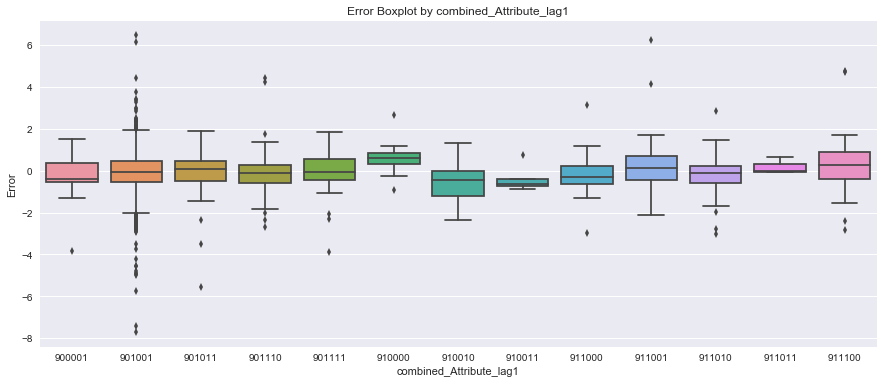

In [302]:
#explore boxplot of combined Attribute at lag1
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Attribute_lag1', y = 'Error', data = fclag_df)
plt.title('Error Boxplot by combined_Attribute_lag1')

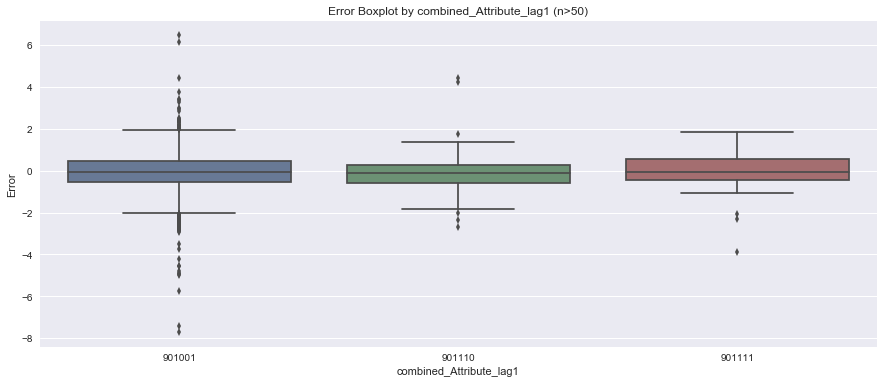

In [303]:
# filter the boxplot to show only groups w n>50
CAL1 = fclag_df.groupby('combined_Attribute_lag1').filter(lambda x: x['combined_Attribute_lag1'].count()>50)
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Attribute_lag1', y = 'Error', data = CAL1)
plt.title('Error Boxplot by combined_Attribute_lag1 (n>50)')

In [304]:
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
CAL1.groupby('combined_Attribute_lag1').describe()

height has been deprecated.



Error
combined_Attribute_lag1                   
901001                  count  3614.000000
                        mean     -0.079243
                        std       0.866734
                        min      -7.700000
                        25%      -0.544000
                        50%      -0.047000
                        75%       0.451000
                        max       6.467000
901110                  count    67.000000
                        mean     -0.051313
                        std       1.103658
                        min      -2.705000
                        25%      -0.602500
                        50%      -0.116000
                        75%       0.296500
                        max       4.415000
901111                  count    72.000000
                        mean     -0.028653
                        std       0.874536
                        min      -3.871000
                        25%      -0.452000
                        50%      -0.065000
                        75%       0.566000
                        max       1.874000

### We can see that for lag1 that 901001 dominates the data (n>3600).  This was expected by the data expert as there is already a setup run in place to try and control lag1 effects.  We will therefore focus on lag2 & lag3.

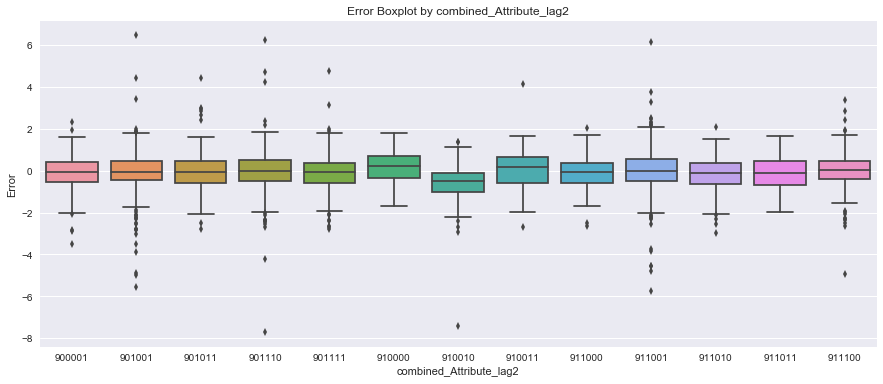

In [305]:
#explore boxplot of combined Attribute at lag2
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Attribute_lag2', y = 'Error', data = fclag_df)
plt.title('Error Boxplot by combined_Attribute_lag2')

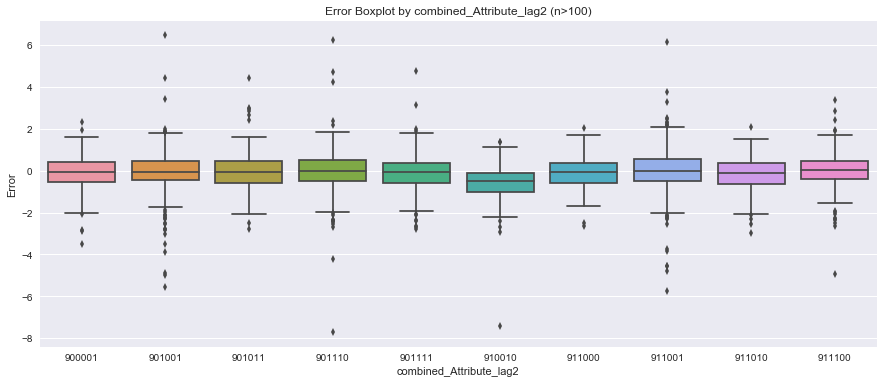

In [306]:
#filter boxplot for n>100 contributions 
CAL2 = fclag_df.groupby('combined_Attribute_lag2').filter(lambda x: x['combined_Attribute_lag2'].count()>100)
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Attribute_lag2', y = 'Error', data = CAL2)
plt.title('Error Boxplot by combined_Attribute_lag2 (n>100)')

##### Box plots for lag2 indicate that 910010 may show some delta from the rest as their box plots are not uniformly centered about 0 

In [307]:
CAL2.groupby('combined_Attribute_lag2').describe()

Error
combined_Attribute_lag2                  
900001                  count  412.000000
                        mean    -0.074859
                        std      0.786959
                        min     -3.479000
                        25%     -0.559250
                        50%     -0.042500
                        75%      0.430750
                        max      2.329000
901001                  count  519.000000
                        mean    -0.062911
                        std      0.979774
                        min     -5.534000
                        25%     -0.462500
                        50%     -0.059000
                        75%      0.448000
                        max      6.467000
901011                  count  240.000000
                        mean    -0.033450
                        std      0.901817
                        min     -2.760000
                        25%     -0.572000
                        50%     -0.041500
                        75%      0.469000
                        max      4.409000
901110                  count  514.000000
                        mean    -0.027471
                        std      0.962538
                        min     -7.700000
                        25%     -0.485500
                        50%      0.012000
                        75%      0.507750
                        max      6.269000
901111                  count  567.000000
                        mean    -0.125287
                        std      0.792523
                        min     -2.766000
                        25%     -0.588500
                        50%     -0.077000
                        75%      0.370000
                        max      4.762000
910010                  count  130.000000
                        mean    -0.592815
                        std      1.002746
                        min     -7.424000
                        25%     -1.011250
                        50%     -0.490000
                        75%     -0.105000
                        max      1.388000
911000                  count  132.000000
                        mean    -0.130856
                        std      0.758087
                        min     -2.659000
                        25%     -0.606000
                        50%     -0.045500
                        75%      0.356750
                        max      2.032000
911001                  count  639.000000
                        mean    -0.004872
                        std      0.998927
                        min     -5.725000
                        25%     -0.495000
                        50%      0.010000
                        75%      0.556500
                        max      6.149000
911010                  count  308.000000
                        mean    -0.185607
                        std      0.791714
                        min     -2.988000
                        25%     -0.619250
                        50%     -0.121000
                        75%      0.353250
                        max      2.102000
911100                  count  404.000000
                        mean     0.027450
                        std      0.809606
                        min     -4.909000
                        25%     -0.397000
                        50%      0.051000
                        75%      0.490000
                        max      3.365000

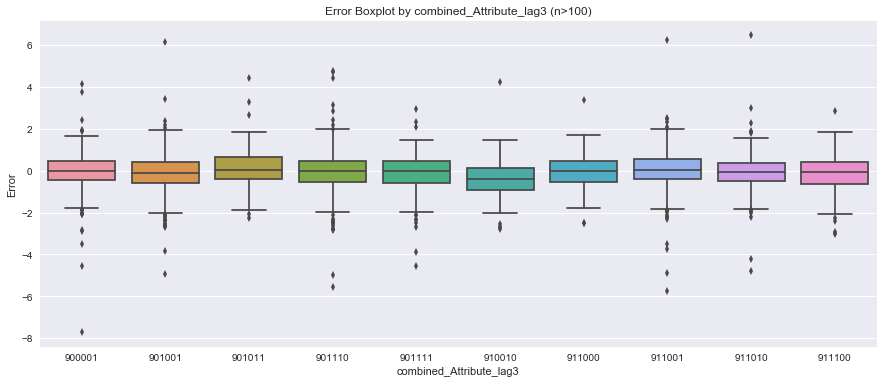

In [308]:
#filtered boxplot for n>100 contributions 
CAL3 = fclag_df.groupby('combined_Attribute_lag3').filter(lambda x: x['combined_Attribute_lag3'].count()>100)
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Attribute_lag3', y = 'Error', data = CAL3)
plt.title('Error Boxplot by combined_Attribute_lag3 (n>100)')

In [309]:
CAL3.groupby('combined_Attribute_lag3').describe()

Error
combined_Attribute_lag3                  
900001                  count  414.000000
                        mean    -0.053925
                        std      0.934810
                        min     -7.700000
                        25%     -0.449500
                        50%     -0.019000
                        75%      0.444750
                        max      4.144000
901001                  count  813.000000
                        mean    -0.092365
                        std      0.852258
                        min     -4.909000
                        25%     -0.588000
                        50%     -0.087000
                        75%      0.427000
                        max      6.149000
901011                  count  179.000000
                        mean     0.097782
                        std      0.956605
                        min     -2.250000
                        25%     -0.407500
                        50%      0.019000
                        75%      0.640000
                        max      4.415000
901110                  count  708.000000
                        mean    -0.030161
                        std      0.934051
                        min     -5.534000
                        25%     -0.533000
                        50%     -0.021500
                        75%      0.471250
                        max      4.762000
901111                  count  431.000000
                        mean    -0.086459
                        std      0.818090
                        min     -4.560000
                        25%     -0.571000
                        50%     -0.017000
                        75%      0.451000
                        max      2.956000
910010                  count  155.000000
                        mean    -0.417323
                        std      0.887815
                        min     -2.793000
                        25%     -0.906000
                        50%     -0.386000
                        75%      0.150000
                        max      4.219000
911000                  count  134.000000
                        mean    -0.095157
                        std      0.822586
                        min     -2.519000
                        25%     -0.517250
                        50%     -0.022000
                        75%      0.466250
                        max      3.365000
911001                  count  407.000000
                        mean     0.025128
                        std      0.960620
                        min     -5.725000
                        25%     -0.408500
                        50%      0.027000
                        75%      0.562000
                        max      6.269000
911010                  count  275.000000
                        mean    -0.081324
                        std      0.935817
                        min     -4.787000
                        25%     -0.505500
                        50%     -0.054000
                        75%      0.393000
                        max      6.467000
911100                  count  384.000000
                        mean    -0.135055
                        std      0.801914
                        min     -3.042000
                        25%     -0.615750
                        50%     -0.076000
                        75%      0.407500
                        max      2.867000

<function matplotlib.pyplot.show>

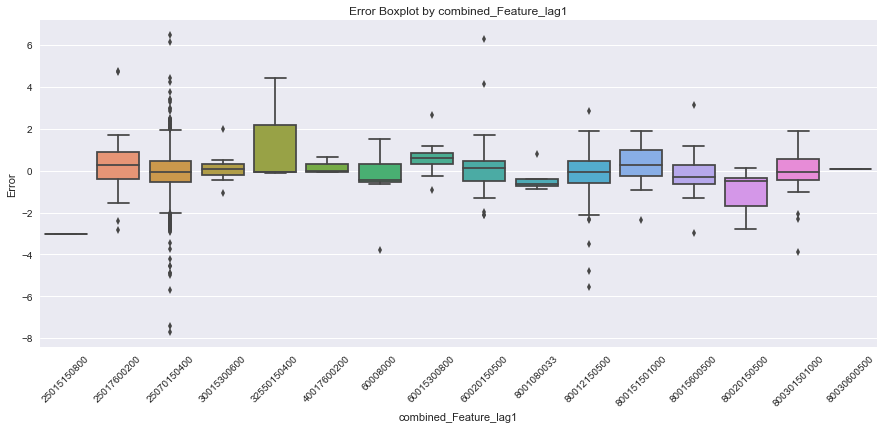

In [310]:
#repeating the same procedure to explore the boxplot and filtered boxplot for each combined Features lag1,2,3

plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'combined_Feature_lag1', y = 'Error', data = fclag_df)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Error Boxplot by combined_Feature_lag1')
plt.show

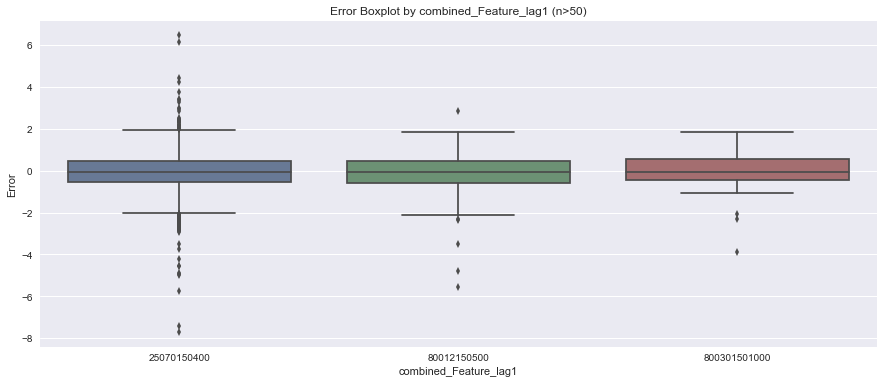

In [311]:
CFL1 = fclag_df.groupby('combined_Feature_lag1').filter(lambda x: x['combined_Feature_lag1'].count()>50)
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Feature_lag1', y = 'Error', data = CFL1)
plt.title('Error Boxplot by combined_Feature_lag1 (n>50)')

In [312]:
CFL1.groupby('combined_Feature_lag1').describe()

Error
combined_Feature_lag1                   
25070150400           count  3645.000000
                      mean     -0.079833
                      std       0.865874
                      min      -7.700000
                      25%      -0.545000
                      50%      -0.049000
                      75%       0.449000
                      max       6.467000
80012150500           count   113.000000
                      mean     -0.176531
                      std       1.160396
                      min      -5.534000
                      25%      -0.603000
                      50%      -0.079000
                      75%       0.444000
                      max       2.838000
800301501000          count    72.000000
                      mean     -0.028653
                      std       0.874536
                      min      -3.871000
                      25%      -0.452000
                      50%      -0.065000
                      75%       0.566000
                      max       1.874000

### We can see that for lag1 that 25070150400 dominates the data (n>3600).  This was expected by the data expert as there is already a setup run in place to try and control lag1 effects.  We will therefore focus on lag2 & lag3.

<function matplotlib.pyplot.show>

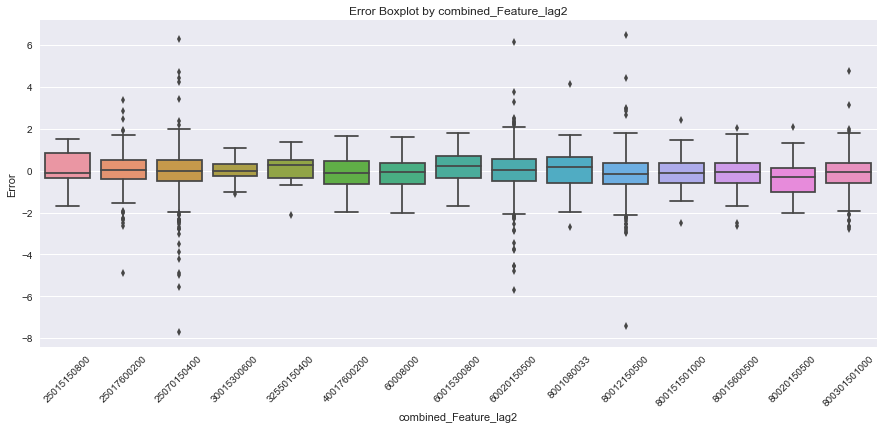

In [313]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'combined_Feature_lag2', y = 'Error', data = fclag_df)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Error Boxplot by combined_Feature_lag2')
plt.show

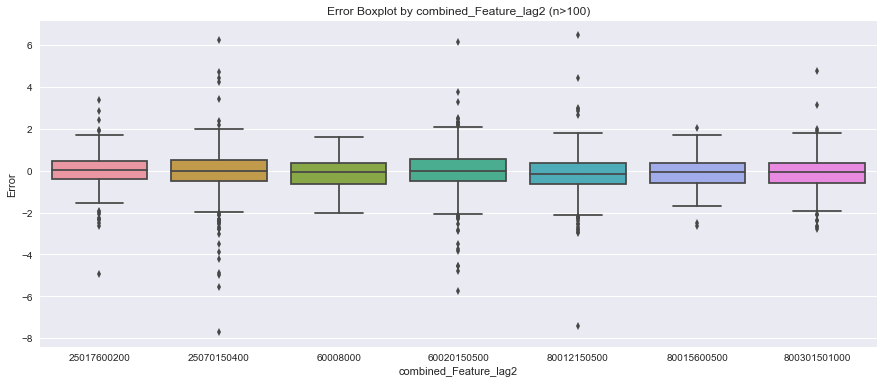

In [314]:
CFL2 = fclag_df.groupby('combined_Feature_lag2').filter(lambda x: x['combined_Feature_lag2'].count()>100)
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Feature_lag2', y = 'Error', data = CFL2)
plt.title('Error Boxplot by combined_Feature_lag2 (n>100)')

<function matplotlib.pyplot.show>

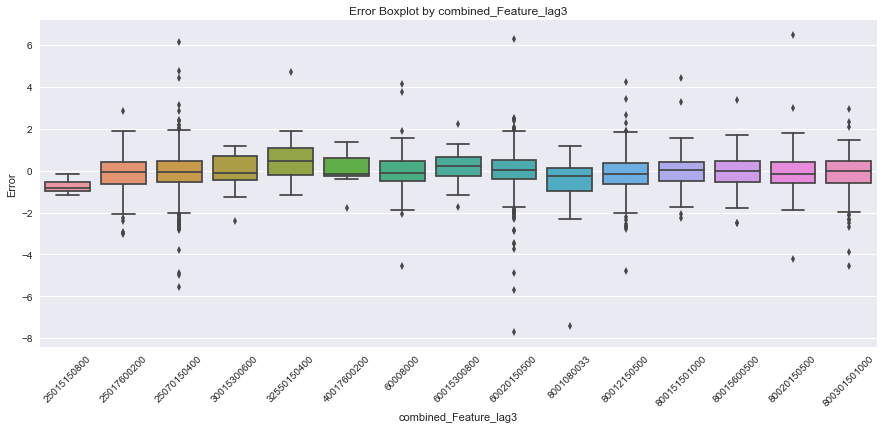

In [315]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'combined_Feature_lag3', y = 'Error', data = fclag_df)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Error Boxplot by combined_Feature_lag3')
plt.show

In [316]:
CFL3 = fclag_df.groupby('combined_Feature_lag3').filter(lambda x: x['combined_Feature_lag3'].count()>100)
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Feature_lag3', y = 'Error', data = CFL3)
plt.title('Error Boxplot by combined_Feature_lag3 (n>100)')

##### when filtered for n>100, the box plots seem to indicate all lag2 & lag3 may be fairly matched but will be checked in ANOVA and Tukey's 

### Peform ANOVA across all combined Attributes and Features at lag = 1,2,3 

In [317]:
import scipy.stats as stats

#ANOVA over 13 combined attribute combinations for lag 1,2,3
for col in fclag_df:
        string = ''
        if (col != 'Error') & ('Attribute' in col):
            grps = fclag_df[col].unique()
            g_c_df = {grp:fclag_df['Error'][fclag_df[col] == grp] for grp in grps}

            F, p = stats.f_oneway(g_c_df[grps[0]], g_c_df[grps[1]], g_c_df[grps[2]], g_c_df[grps[3]],g_c_df[grps[4]] \
                                 ,g_c_df[grps[5]], g_c_df[grps[6]], g_c_df[grps[7]], g_c_df[grps[8]],g_c_df[grps[9]] \
                                 ,g_c_df[grps[10]], g_c_df[grps[11]], g_c_df[grps[12]])
            print (col, 'F =', F, 'p =', p)


combined_Attribute_lag1 F = 2.40038669078 p = 0.0043102279205
combined_Attribute_lag2 F = 5.36740225337 p = 4.21953173956e-09
combined_Attribute_lag3 F = 4.50715328752 p = 2.98093497024e-07


In [318]:
#repeat same ANOVA over 15 features lag 1,2,3
for col in fclag_df:
        string = ''
        if (col != 'Error') & ('Feature' in col):
            grps = fclag_df[col].unique()
            g_c_df = {grp:fclag_df['Error'][fclag_df[col] == grp] for grp in grps}

            F, p = stats.f_oneway(g_c_df[grps[0]], g_c_df[grps[1]], g_c_df[grps[2]], g_c_df[grps[3]],g_c_df[grps[4]] \
                                 ,g_c_df[grps[5]], g_c_df[grps[6]], g_c_df[grps[7]], g_c_df[grps[8]],g_c_df[grps[9]] \
                                 ,g_c_df[grps[10]], g_c_df[grps[11]], g_c_df[grps[12]],g_c_df[grps[13]], g_c_df[grps[14]])
            print (col, 'F =', F, 'p =', p)

combined_Feature_lag1 F = 3.42101451436 p = 1.48528855796e-05
combined_Feature_lag2 F = 2.43766643711 p = 0.00203980043856
combined_Feature_lag3 F = 2.93961682199 p = 0.000177577464664


### We can see that p <=  0.05 for all 3 lags both features and attributes so we reject the null hypothesis under each lag and conclude that at least one of the means is differenent at each lag.  We will explore the differences further in Tukey's range test.

In [319]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

### Perform TukeyHSD  on the combined Attributes and Features (filtered for groups with n>100) across each lag = 1,2,3

In [320]:
mc = MultiComparison(CAL1['Error'], CAL1['combined_Attribute_lag1'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
901001 901110  0.0279   -0.224 0.2799 False 
901001 901111  0.0506  -0.1926 0.2938 False 
901110 901111  0.0227  -0.3242 0.3696 False 
--------------------------------------------
['901001' '901110' '901111']


### Data indicates all groups are matched at lag1 (*when filtered for n>50)

In [321]:
mc = MultiComparison(CAL2['Error'], CAL2['combined_Attribute_lag2'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
900001 901001  0.0119  -0.1746  0.1985 False 
900001 901011  0.0414  -0.1882  0.271  False 
900001 901110  0.0474  -0.1396  0.2343 False 
900001 901111 -0.0504  -0.2335  0.1326 False 
900001 910010  -0.518  -0.8024 -0.2335  True 
900001 911000  -0.056  -0.3388  0.2268 False 
900001 911001   0.07   -0.1087  0.2486 False 
900001 911010 -0.1107  -0.3237  0.1022 False 
900001 911100  0.1023  -0.0957  0.3003 False 
901001 901011  0.0295  -0.1912  0.2502 False 
901001 901110  0.0354  -0.1405  0.2114 False 
901001 901111 -0.0624  -0.2341  0.1094 False 
901001 910010 -0.5299  -0.8072 -0.2526  True 
901001 911000 -0.0679  -0.3436  0.2077 False 
901001 911001  0.058    -0.109  0.2251 False 
901001 911010 -0.1227  -0.3261  0.0807 False 
901001 911100  0.0904  -0.0972  0.2779 False 
901011 901110  0.006   -0.2151  0.227  False 
901011 901111 -0.0918  -0.309

### (*when comparing only n>100 groups) Data indicates 910010  is not matched to other processes when lag2.  Recommendation to explore rules to prevent this occurrence.  (n=130) and mean difference of  ~0.5 from the rest of the groups is likely meaningful. 
CMPS at lag2

In [322]:
mc = MultiComparison(CAL3['Error'], CAL3['combined_Attribute_lag3'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
900001 901001 -0.0384  -0.2088  0.1319 False 
900001 901011  0.1517  -0.1007  0.4041 False 
900001 901110  0.0238  -0.1508  0.1983 False 
900001 901111 -0.0325  -0.2267  0.1616 False 
900001 910010 -0.3634  -0.6291 -0.0977  True 
900001 911000 -0.0412  -0.3217  0.2392 False 
900001 911001  0.0791  -0.1179  0.276  False 
900001 911010 -0.0274  -0.2469  0.1921 False 
900001 911100 -0.0811   -0.281  0.1188 False 
901001 901011  0.1901  -0.0428  0.4231 False 
901001 901110  0.0622  -0.0828  0.2072 False 
901001 901111  0.0059  -0.1622  0.174  False 
901001 910010  -0.325  -0.5723 -0.0777  True 
901001 911000 -0.0028  -0.2659  0.2603 False 
901001 911001  0.1175  -0.0538  0.2888 False 
901001 911010  0.011   -0.1858  0.2079 False 
901001 911100 -0.0427  -0.2174  0.132  False 
901011 901110 -0.1279   -0.364  0.1081 False 
901011 901111 -0.1842  -0.435

### Data indicates 910010  is not matched to other processes when lag3.  Recommendation to explore rules to prevent this occurrence.  (n~150) and mean difference of  ~0.3-0.4 from the rest of the groups is likely meaningful. 
3544 CMPS at lag2 and lag3

##### Because the 910010 lag effect is seen at lag2 & lag3, we will quickly check lag4 to see how many lags are required for the effect to die.  This would be of particular import to the customer when creating rules.  It may help determine if run rules or strict segregation are required for this particular material combination.

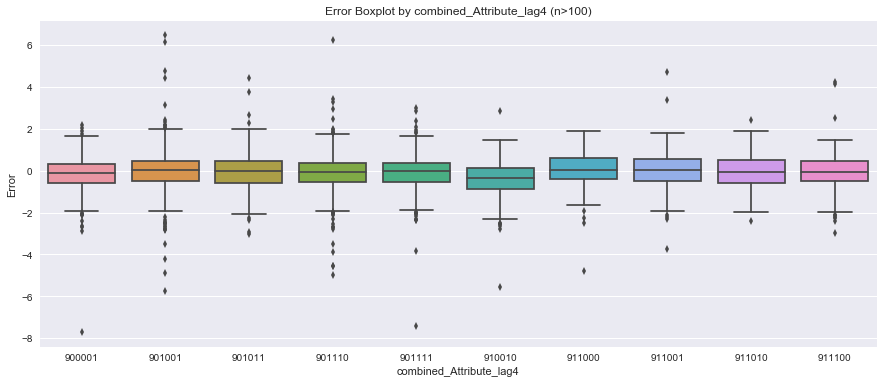

In [329]:
#filtered boxplot for n>100 contributions 
CAL4 = fclag_df.groupby('combined_Attribute_lag4').filter(lambda x: x['combined_Attribute_lag4'].count()>100)
plt.figure(figsize=(15,6))
sns.boxplot(x = 'combined_Attribute_lag4', y = 'Error', data = CAL4)
plt.title('Error Boxplot by combined_Attribute_lag4 (n>100)')

In [330]:
CAL4.groupby('combined_Attribute_lag4').describe()

Error
combined_Attribute_lag4                   
900001                  count   434.000000
                        mean     -0.172776
                        std       0.843418
                        min      -7.700000
                        25%      -0.581000
                        50%      -0.127000
                        75%       0.345750
                        max       2.189000
901001                  count  1060.000000
                        mean     -0.027141
                        std       0.903398
                        min      -5.725000
                        25%      -0.500250
                        50%       0.015500
                        75%       0.490000
                        max       6.467000
901011                  count   194.000000
                        mean     -0.035902
                        std       0.975341
                        min      -3.042000
                        25%      -0.600000
                        50%      -0.023000
                        75%       0.490500
                        max       4.415000
901110                  count   667.000000
                        mean     -0.093483
                        std       0.917610
                        min      -4.980000
                        25%      -0.551000
                        50%      -0.077000
                        75%       0.380500
                        max       6.269000
901111                  count   376.000000
                        mean     -0.092559
                        std       0.915697
                        min      -7.424000
                        25%      -0.544250
                        50%      -0.025000
                        75%       0.378250
                        max       2.998000
910010                  count   138.000000
                        mean     -0.434254
                        std       1.006200
                        min      -5.534000
                        25%      -0.892250
                        50%      -0.348000
                        75%       0.155250
                        max       2.838000
911000                  count   123.000000
                        mean      0.008504
                        std       0.924364
                        min      -4.787000
                        25%      -0.393500
                        50%       0.022000
                        75%       0.596500
                        max       1.907000
911001                  count   227.000000
                        mean      0.037643
                        std       0.898255
                        min      -3.725000
                        25%      -0.466500
                        50%       0.027000
                        75%       0.541000
                        max       4.711000
911010                  count   282.000000
                        mean     -0.051766
                        std       0.783165
                        min      -2.402000
                        25%      -0.570750
                        50%      -0.054500
                        75%       0.503000
                        max       2.447000
911100                  count   374.000000
                        mean     -0.042342
                        std       0.848373
                        min      -2.988000
                        25%      -0.501750
                        50%      -0.049500
                        75%       0.488500
                        max       4.219000

In [331]:
mc = MultiComparison(CAL4['Error'], CAL4['combined_Attribute_lag4'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
900001 901001  0.1456  -0.0159  0.3071 False 
900001 901011  0.1369  -0.1079  0.3816 False 
900001 901110  0.0793  -0.0955  0.2541 False 
900001 901111  0.0802  -0.1194  0.2799 False 
900001 910010 -0.2615  -0.5384  0.0155 False 
900001 911000  0.1813  -0.1082  0.4707 False 
900001 911001  0.2104  -0.0217  0.4425 False 
900001 911010  0.121   -0.0957  0.3378 False 
900001 911100  0.1304  -0.0695  0.3304 False 
901001 901011 -0.0088  -0.2301  0.2125 False 
901001 901110 -0.0663  -0.2064  0.0737 False 
901001 901111 -0.0654  -0.2355  0.1047 False 
901001 910010 -0.4071  -0.6636 -0.1507  True 
901001 911000  0.0356  -0.2343  0.3056 False 
901001 911001  0.0648  -0.1425  0.272  False 
901001 911010 -0.0246  -0.2145  0.1652 False 
901001 911100 -0.0152  -0.1856  0.1552 False 
901011 901110 -0.0576  -0.2887  0.1736 False 
901011 901111 -0.0567  -0.307

##### The data indicates that even at lag4, 910010 has a strong difference from the rest of the groups by ~0.3-0.4.  Therefore, Lag effect is strong at lag2,3,4 and customer may investigate more aggressive modes of containment such as pure segregation of this material combination.

##### Continue analysis by performing the same Tukey analysis on combined Features at lag 1,2,3 

In [323]:
mc = MultiComparison(CFL1['Error'], CFL1['combined_Feature_lag1'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05  
   group1      group2    meandiff  lower  upper  reject
-------------------------------------------------------
25070150400 80012150500  -0.0967  -0.2929 0.0995 False 
25070150400 800301501000  0.0512  -0.1933 0.2956 False 
80012150500 800301501000  0.1479  -0.1619 0.4576 False 
-------------------------------------------------------
['25070150400' '80012150500' '800301501000']


### Data indicates all groups are matched at lag1 (*when filtered for n>50)

In [324]:
mc = MultiComparison(CFL2['Error'], CFL2['combined_Feature_lag2'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1      group2    meandiff  lower   upper  reject
--------------------------------------------------------
25017600200 25070150400  -0.0663  -0.2289  0.0962 False 
25017600200   60008000   -0.1402  -0.3766  0.0963 False 
25017600200 60020150500  -0.0426  -0.2031  0.1179 False 
25017600200 80012150500  -0.2091  -0.3745 -0.0437  True 
25017600200 80015600500  -0.1583  -0.4254  0.1087 False 
25017600200 800301501000 -0.1527  -0.3262  0.0207 False 
25070150400   60008000   -0.0738  -0.2911  0.1435 False 
25070150400 60020150500   0.0238  -0.1068  0.1544 False 
25070150400 80012150500  -0.1427  -0.2793 -0.0062  True 
25070150400 80015600500   -0.092  -0.3422  0.1583 False 
25070150400 800301501000 -0.0864  -0.2326  0.0598 False 
  60008000  60020150500   0.0976  -0.1182  0.3133 False 
  60008000  80012150500  -0.0689  -0.2883  0.1505 False 
  60008000  80015600500  -0.0181  -0.3216  0.2854 False 
  60008000  800301501000 -0.012

### Data indicates 80012150500  is not matched to other processes when lag2.  Recommendation to explore rules to prevent this occurrence.  This feature combination also runs with the material combination 910010.  I believe this further bolsters the confidence that the effect may be real.  The material combination may be the stronger factor when looking at meandiff between the groups.

In [325]:
mc = MultiComparison(CFL3['Error'], CFL3['combined_Feature_lag3'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05  
   group1      group2    meandiff  lower  upper  reject
-------------------------------------------------------
25017600200 25070150400   0.0651  -0.0856 0.2158 False 
25017600200   60008000    0.0758  -0.1826 0.3341 False 
25017600200 60020150500   0.1292  -0.0363 0.2948 False 
25017600200 80012150500   0.0016  -0.1657 0.1689 False 
25017600200 80015600500   0.0399  -0.2206 0.3004 False 
25017600200 800301501000  0.0486  -0.1336 0.2308 False 
25070150400   60008000    0.0107  -0.2224 0.2438 False 
25070150400 60020150500   0.0642  -0.0583 0.1867 False 
25070150400 80012150500  -0.0635  -0.1884 0.0615 False 
25070150400 80015600500  -0.0252  -0.2606 0.2103 False 
25070150400 800301501000 -0.0165  -0.1607 0.1277 False 
  60008000  60020150500   0.0535  -0.1895 0.2964 False 
  60008000  80012150500  -0.0742  -0.3184  0.17  False 
  60008000  80015600500  -0.0359  -0.3513 0.2795 False 
  60008000  800301501000 -0.0272  -0.2818 0.2274

### Data indicates all groups are matched at lag3 (*when filtered for n>100).  Noting that 80012150500 is not present is further evidence that material combination 910010 is the strongest factor.  910010 is unique but feature combination 80012150500 is shared across several material combinations.
CMPS recipe used at 3504, 3524, and 3544 but only the material combination at 3544 adversely affects Error

### At this point we have found a fairly strong indicator for increased absolute Error (Namely 910010 material attribute combination at either a lag2, lag3, or lag4!).  
### Can we check across lag combinations and perform analysis (lag2+3, lag3+4, lag2+3+4, etc)
### Can the combined attribute analysis also be confirmed using the Welch's Cross Power Spectral Density weighted Coherence with single factors that was attempted earlier? 

In [348]:
#create new combo columns that are back to back combinations of lags
combo_df = fclag_df
combo_df['cAttr_L12'] = combo_df['combined_Attribute_lag1'].map(str) + combo_df['combined_Attribute_lag2'].map(str) 
combo_df['cAttr_L23'] = combo_df['combined_Attribute_lag2'].map(str) + combo_df['combined_Attribute_lag3'].map(str) 
combo_df['cAttr_L34'] = combo_df['combined_Attribute_lag3'].map(str) + combo_df['combined_Attribute_lag4'].map(str) 
combo_df['cAttr_L45'] = combo_df['combined_Attribute_lag4'].map(str) + combo_df['combined_Attribute_lag5'].map(str) 

combo_df['cFeat_L12'] = combo_df['combined_Feature_lag1'].map(str) + combo_df['combined_Feature_lag2'].map(str) 
combo_df['cFeat_L23'] = combo_df['combined_Feature_lag2'].map(str) + combo_df['combined_Feature_lag3'].map(str) 
combo_df['cFeat_L34'] = combo_df['combined_Feature_lag3'].map(str) + combo_df['combined_Feature_lag4'].map(str) 
combo_df['cFeat_L45'] = combo_df['combined_Feature_lag4'].map(str) + combo_df['combined_Feature_lag5'].map(str) 

#filter the df down to 2 combo columns 
filtcombo_df = combo_df.filter(regex = 'Error|cAttr|cFeat')
filtcombo_df

Error  cAttr_L12_df  cAttr_L23_df  cAttr_L34_df  cAttr_L45_df  \
0    -1.086  911100911010  911010910010  910010901011  901011901110   
1     0.449  901001901011  901011901111  901111911100  911100901110   
2     0.471  901001901001  901001910000  910000910010  910010910010   
3     0.540  901001901110  901110901001  901001901001  901001910000   
4    -0.438  901001911010  911010901110  901110901001  901001911100   
5    -0.241  901001910010  910010901001  901001911100  911100911100   
6    -1.234  901001901011  901011901111  901111901110  901110910010   
7    -0.926  901001911001  911001911100  911100911100  911100901001   
8     0.249  901001911001  911001901001  901001901011  901011901110   
9     1.640  901111901001  901001911001  911001901001  901001901001   
10    1.411  901001911001  911001911100  911100911010  911010911010   
11    0.138  901001911001  911001911010  911010910010  910010911010   
12   -0.817  901001911001  911001911100  911100901001  901001911000   
13    0.818  901001911001  911001901111  901111901110  901110901001   
14    0.897  901001911001  911001901011  901011901110  901110901011   
15   -0.609  901001911001  911001901111  901111901110  901110901001   
16   -0.240  901001911001  911001901110  901110901001  901001911001   
17    0.034  901001911001  911001911010  911010901111  901111901111   
18    0.179  901001911001  911001911010  911010911100  911100901111   
19    0.920  901001911001  911001901001  901001911100  911100911100   
20   -0.245  901001911001  911001910010  910010911100  911100911100   
21   -4.560  901001911001  911001901111  901111901110  901110901001   
22   -0.380  901001911001  911001911000  911000901001  901001911001   
23   -0.216  901001911001  911001901110  901110901001  901001911001   
24    0.119  901001911001  911001911010  911010901111  901111901111   
25   -2.118  911001901001  901001901001  901001900001  900001901001   
26   -0.220  901001911001  911001911100  911100900001  900001900001   
27   -0.965  901001911001  911001901001  901001900001  900001900001   
28   -0.957  901001911001  911001901111  901111911000  911000901001   
29   -1.183  901001900001  900001900001  900001900001  900001900001   
30   -1.219  901001911001  911001910010  910010911100  911100910010   
31   -0.236  901001911001  911001901111  901111901110  901110901001   
32   -0.195  901001911001  911001900001  900001901111  901111901111   
33   -0.872  911001901001  901001911100  911100901001  901001900001   
34    0.192  901001911001  911001901110  901110911001  911001901001   
35    0.238  901001911001  911001901110  901110901001  901001911001   
36   -1.356  901001901001  901001910010  910010901111  901111901001   
37   -0.171  901001901111  901111901110  901110901001  901001901001   
38    0.494  901001911100  911100911000  911000901001  901001911100   
39   -0.854  901001900001  900001900001  900001900001  900001901001   
40    0.562  901001901111  901111901001  901001900001  900001901111   
41    0.462  901001900001  900001901111  901111911010  911010910010   
42    0.564  901001901001  901001901001  901001901001  901001900001   
43    0.225  901001911000  911000901001  901001901001  901001901001   
44   -0.499  901001911100  911100901001  901001901011  901011901110   
45   -0.187  901001900001  900001901001  901001911001  911001911001   
46   -0.183  901001911010  911010911010  911010910000  910000901001   
47   -0.148  901001901001  901001900001  900001901110  901110901001   
48   -0.704  901001911000  911000901001  901001911010  911010911100   
49   -0.514  901001900001  900001901001  901001901111  901111901111   
50   -1.940  901001911100  911100911100  911100911100  911100911000   
51   -0.268  901001900001  900001911010  911010901110  901110901001   
52   -2.150  901001911001  911001901001  901001901111  901111911010   
53   -0.336  901001911010  911010910000  910000901110  901110901001   
54   -0.050  901001911010  911010901111  901111901110  901110901001   
55    0.303  901001911010  911

<function matplotlib.pyplot.show>

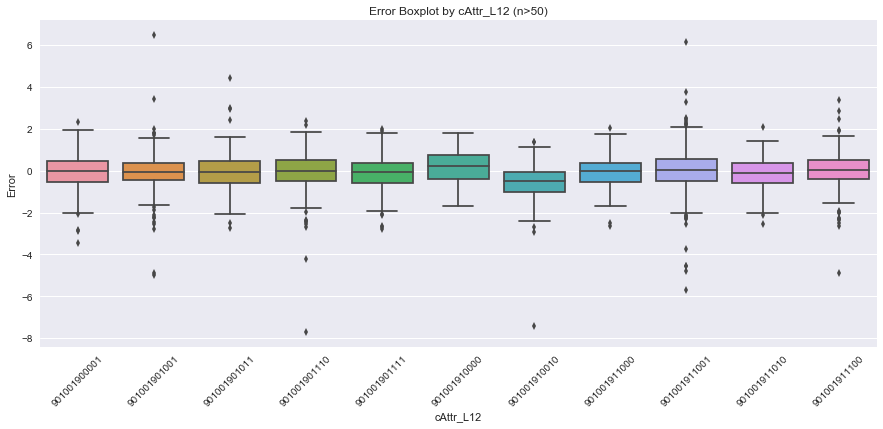

In [354]:
#filtered boxplot for n>100 contributions 
CAL12 = filtcombo_df.groupby('cAttr_L12').filter(lambda x: x['cAttr_L12'].count()>50)
plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'cAttr_L12', y = 'Error', data = CAL12)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Error Boxplot by cAttr_L12 (n>50)')
plt.show

In [350]:
mc = MultiComparison(CAL12['Error'], CAL12['cAttr_L12'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower   upper  reject
---------------------------------------------------------
901001900001 901001901001 -0.0229  -0.2283  0.1824 False 
901001900001 901001901011 -0.0018   -0.234  0.2304 False 
901001900001 901001901110  0.0179  -0.1727  0.2084 False 
901001900001 901001901111 -0.0732  -0.2565   0.11  False 
901001900001 901001910000  0.147   -0.2654  0.5595 False 
901001900001 901001910010 -0.5263  -0.8123 -0.2403  True 
901001900001 901001911000 -0.0624  -0.3467  0.2219 False 
901001900001 901001911001  0.0631  -0.1141  0.2404 False 
901001900001 901001911010  -0.097  -0.3117  0.1176 False 
901001900001 901001911100  0.0819  -0.1164  0.2801 False 
901001901001 901001901011  0.0211  -0.2187  0.261  False 
901001901001 901001901110  0.0408   -0.159  0.2405 False 
901001901001 901001901111 -0.0503  -0.2431  0.1426 False 
901001901001 901001910000   0.17   -0.2468  0.5867 False 
901001901001 9

<function matplotlib.pyplot.show>

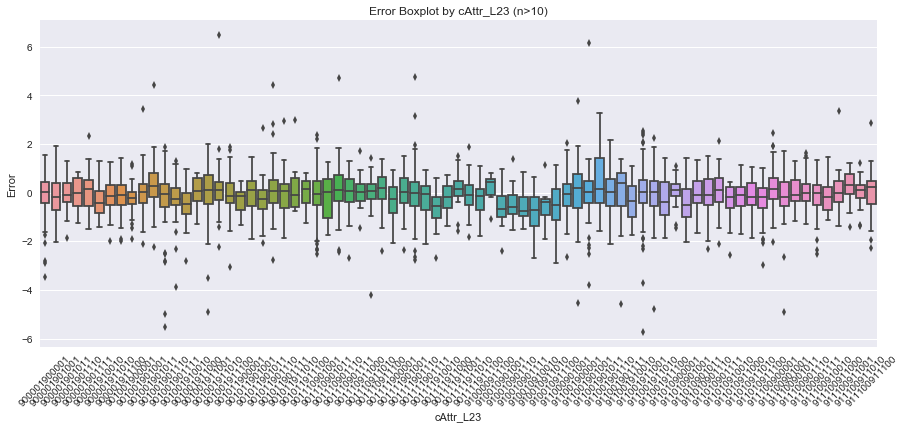

In [360]:
#filtered boxplot for n>100 contributions 
CAL23 = filtcombo_df.groupby('cAttr_L23').filter(lambda x: x['cAttr_L23'].count()>10)
plt.figure(figsize=(15,6))
ax = sns.boxplot(x = 'cAttr_L23', y = 'Error', data = CAL23)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Error Boxplot by cAttr_L23 (n>10)')
plt.show

In [361]:
mc = MultiComparison(CAL23['Error'], CAL23['cAttr_L23'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower   upper  reject
---------------------------------------------------------
900001900001 900001901001 -0.0629  -0.6378  0.5119 False 
900001900001 900001901011 -0.0283  -1.0766  1.0199 False 
900001900001 900001901110 -0.0319  -0.7999  0.736  False 
900001900001 900001901111  0.1278   -0.443  0.6986 False 
900001900001 900001910010 -0.2625  -1.1442  0.6191 False 
900001900001 900001911010 -0.1769  -0.9869  0.6331 False 
900001900001 900001911100 -0.1101  -0.7392  0.519  False 
900001900001 901001900001 -0.2144  -0.8694  0.4406 False 
900001900001 901001901001  0.0341  -0.5148  0.583  False 
900001900001 901001901011  0.4396  -0.1957  1.0748 False 
900001900001 901001901110 -0.1846  -0.6689  0.2998 False 
900001900001 901001901111 -0.1973  -0.7566  0.3621 False 
900001900001 901001910010 -0.4175  -1.2607  0.4257 False 
900001900001 901001911000  0.0249  -0.6975  0.7473 False 
900001900001 9

In [ ]:
910010